## Project 1 Programming Questions
***

In [50]:
import numpy as np
from sklearn import tree

In [51]:
import matplotlib.pyplot as p

<b> Question 1a: </b> For max_depth = 1, .., 10, use DecisionTreeClassifier [1] to learn
a decision tree using criterion=’entropy’, and compute the average training and testing
accuracy on each of the three MONK’s problems. Make three plots, one for each of the
MONK’s problem sets, plotting training and testing accuracy curves together for each
problem, with tree depth on the x-axis and error on the y-axis.

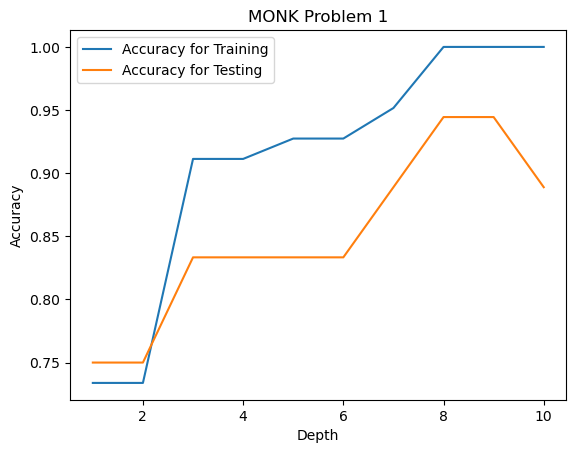

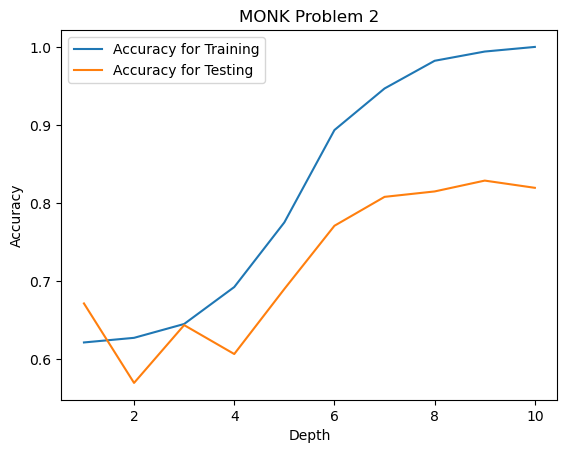

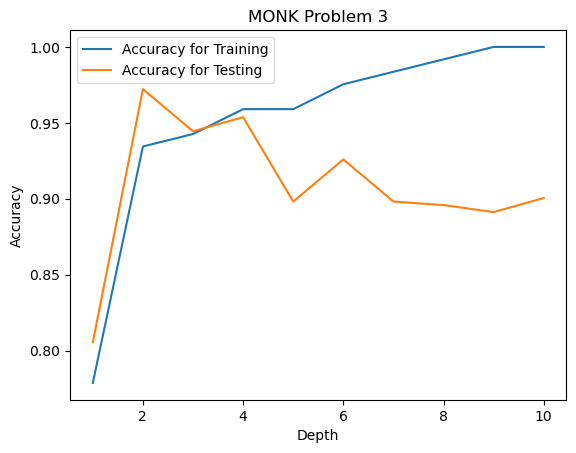

In [53]:
def getData(filename):
    d = np.loadtxt(filename, delimiter=',')  # ',' as delimeter because in the files that is used for separation
    X = d[:, 1:]  
    y = d[:, 0] 
    return X, y

# Step 2: Initialize the Decision Tree
def dTree(X_Train, y_Train, max_Depth):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_Depth)
    clf.fit(X_Train, y_Train)
    return clf

# Step 3: Get training and testing accuracy 
def computeAcc(X_Train, y_Train, X_Test, y_Test, max_Depth):
    # Train the decision tree
    clf = dTree(X_Train, y_Train, max_Depth)
    # Compute the train accuracy of the model
    train_Acc = clf.score(X_Train, y_Train)
    # Compute the test accuracy of the model
    test_Acc = clf.score(X_Test, y_Test)
    return train_Acc, test_Acc

maxDepthRange = range(1, 11)
# Step 4: Train decision trees for each depth (1...10) 
def train_for_each_depth(X_Train, y_Train, X_Test, y_Test): 
    trainAccuracy = []  
    testAccuracy = []

    # Loop through each depth
    for d in maxDepthRange: 
        trainAcc, testAcc = computeAcc(X_Train, y_Train, X_Test, y_Test, d)
        trainAccuracy.append(trainAcc)
        testAccuracy.append(testAcc)
        
    return trainAccuracy, testAccuracy

# Step 5: Load MONK's training and testing data
monks1_Train_X, monks1_Train_y = getData('monks-1.train')
monks1_Test_X, monks1_Test_y = getData('monks-1.test')

monks2_Train_X, monks2_Train_y = getData('monks-2.train')
monks2_Test_X, monks2_Test_y = getData('monks-2.test')

monks3_Train_X, monks3_Train_y = getData('monks-3.train')
monks3_Test_X, monks3_Test_y = getData('monks-3.test')

# Step 6: Implement the accuracy methods on each Problem 
trainAccuracy1, testAccuracy1 = train_for_each_depth(monks1_Train_X, monks1_Train_y, monks1_Test_X, monks1_Test_y)

trainAccuracy2, testAccuracy2 = train_for_each_depth(monks2_Train_X, monks2_Train_y, monks2_Test_X, monks2_Test_y)

trainAccuracy3, testAccuracy3 = train_for_each_depth(monks3_Train_X, monks3_Train_y, monks3_Test_X, monks3_Test_y)

# Create the plots for each Problem
p.plot(maxDepthRange, trainAccuracy1, label='Accuracy for Training')
p.plot(maxDepthRange, testAccuracy1, label='Accuracy for Testing')
p.xlabel('Depth')
p.ylabel('Accuracy')
p.title('MONK Problem 1')
p.legend()
p.show()

p.plot(maxDepthRange, trainAccuracy2, label='Accuracy for Training')
p.plot(maxDepthRange, testAccuracy2, label='Accuracy for Testing')
p.xlabel('Depth')
p.ylabel('Accuracy')
p.title('MONK Problem 2')
p.legend()
p.show()

p.plot(maxDepthRange, trainAccuracy3, label='Accuracy for Training')
p.plot(maxDepthRange, testAccuracy3, label='Accuracy for Testing')
p.xlabel('Depth')
p.ylabel('Accuracy')
p.title('MONK Problem 3')
p.legend()
p.show()

<b> Question 1b: </b> For monks-1, use scikit-learn’s DecisionTreeClassifier [1] to
learn a decision tree using criterion=’entropy’ for depth = 5. Report the visualized learned
decision tree and the confusion matrix on the test set. You may use scikit-learn’s confusion
matrix() function [2].

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as p

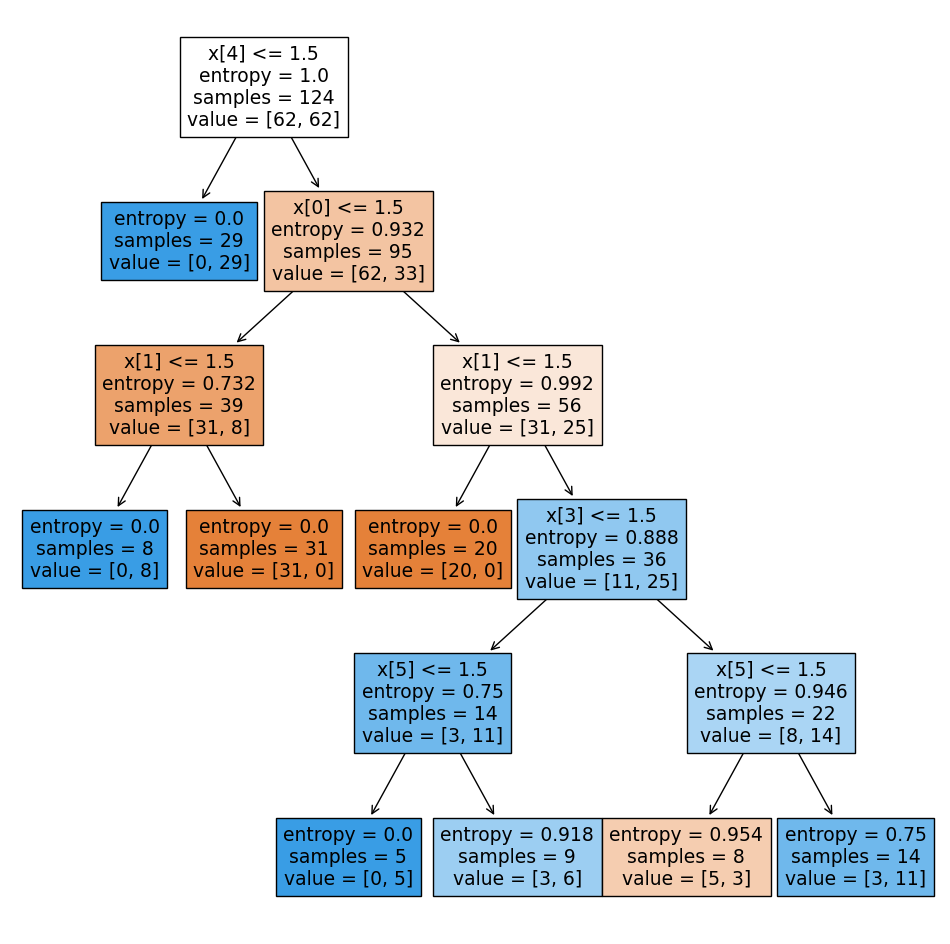

Confusion Matrix: [[168  48]
 [ 24 192]]


In [66]:
# Step 1: Load the data 
monksTrain_X, monksTrain_y = getData('monks-1.train')
monksTest_X, monksTest_y = getData('monks-1.test')

# Step 2: Initialize the Decision Tree
# max_Depth = 5 because we are asked to use depth = 5
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5) 
clf.fit(monksTrain_X, monksTrain_y)

# Step 3: Plotting the Decision Tree
p.figure(figsize=(12, 12))
tree.plot_tree(clf, filled=True)
p.show()

# Step 4: Predict the test set
y_predict = clf.predict(monksTest_X)

# Step 5: Computing the Confusion Matrix 
# Confusion_matrix is an inbuilt function in sklearn 
confusionMatrix = confusion_matrix(monksTest_y, y_predict)
print("Confusion Matrix:", confusionMatrix)

<b> Question 1c: </b> (confusion matrix, 20 points) For monks-1, use scikit-learn’s DecisionTreeClassifier [1] to
learn a decision tree using criterion=’gini’ for depth = 5. Report the visualized learned
decision tree and the confusion matrix on the test set. Compare the decision tree and confusion
matrix obtained in this problem with the results obtained in problem b, and report your
findings.

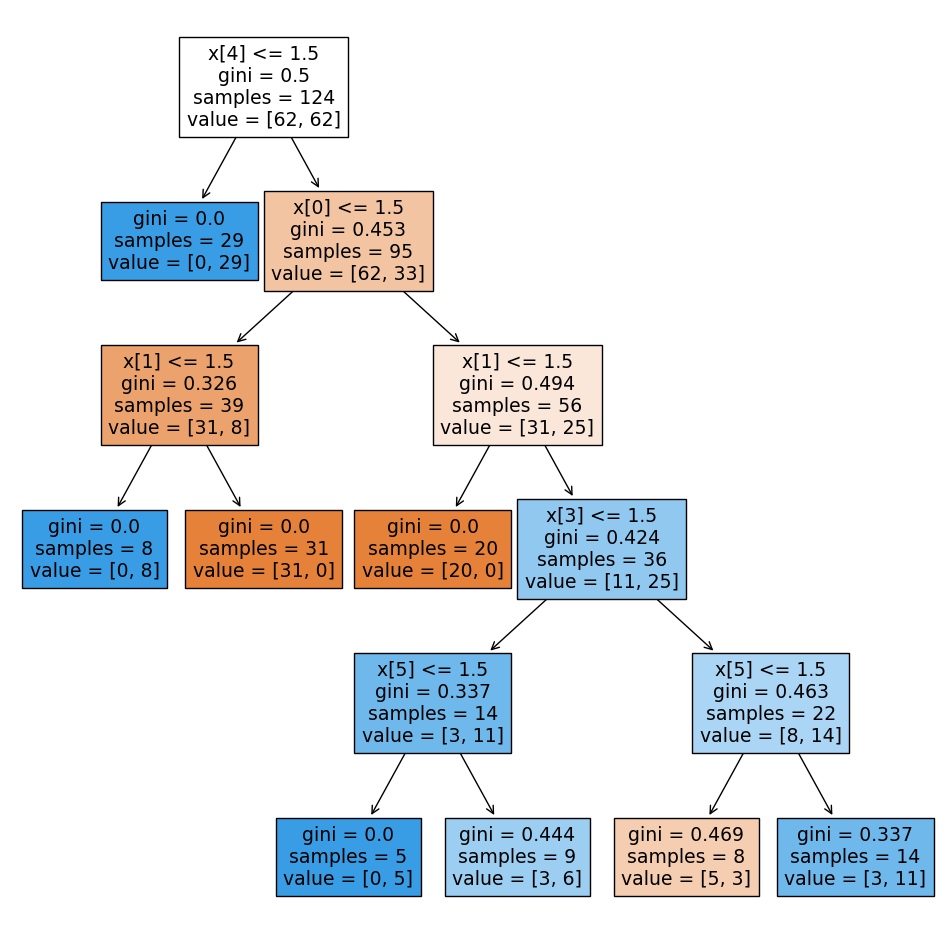

Confusion Matrix: [[168  48]
 [ 24 192]]


In [72]:
# Step 1: Loading the data
monksTrain_X, monksTrain_y = getData('monks-1.train')
monksTest_X, monksTest_y = getData('monks-1.test')

clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf.fit(monksTrain_X, monksTrain_y)

# Plot the decision tree
# The tree is too large to fit in the screen, so we will plot it in a larger figure
p.figure(figsize=(12, 12))
tree.plot_tree(clf, filled=True)
p.show()

# Predict the test set
y_pred = clf.predict(monksTest_X)

# Compute the confusion matrix
confusionMatrix = confusion_matrix(monksTest_y, y_pred)
print("Confusion Matrix:", confusionMatrix)

Comparing the decision trees from b and c. 

<b> Analysis: </b> The difference between both trees that are generated is mostly related to what criteria is used to splot the nodes. Given these similarities, the dataset seems well balanced because both criteria lead to similar decision tree and confusion matrices. 